In [12]:
from keras.layers import containers, AutoEncoder, Dense
from keras import models
from keras.utils.visualize_util import plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from utils import JPtools as jpt
from sklearn.cross_validation import train_test_split
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

In [2]:
X, _ = jpt.manyPsf(batch_size=555)
X_train, X_val = train_test_split(X, test_size = 0.1, random_state = 42)

In [39]:
encoder = containers.Sequential()
encoder.add(Dense(output_dim = 40, input_dim = 20, init = 'positive_uniform', activation = 'linear'))

In [40]:
decoder = containers.Sequential()
decoder.add(Dense(output_dim = 20, input_dim = 40, init = 'positive_uniform', activation = 'linear'))

In [41]:
ae = AutoEncoder(encoder = encoder, decoder = decoder)

In [42]:
model = models.Sequential()
model.add(ae)
model.compile(optimizer='sgd', loss = 'mse')


In [44]:
%%capture
model.fit(X_train, X_train, nb_epoch=10)

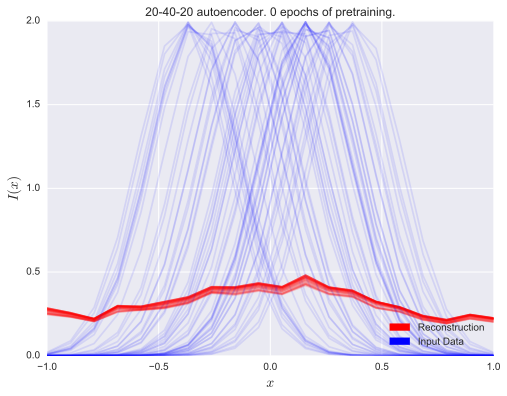

In [45]:
model.layers[0].output_reconstruction = True
model.compile(optimizer = 'sgd', loss = 'mse')
x_range = np.linspace(-1, 1, len(X_val[0]))
n = len(X_val[0])
f = plt.figure()
f.set_size_inches(8, 6)
X_pred = model.predict(X_val)
for i in xrange(len(X_val)):
    plt.plot(x_range, X_val[i][0:n], color = 'b', alpha = 0.1)
    plt.plot(x_range, X_pred[i][0:n], color = 'r', alpha = 0.1)
plt.xlabel(r"$x$", size=14)
plt.ylabel(r"$I(x)$", size=14)
#plt.title("Predictions and True Values for Validation Set {} epochs, {} samples".format(, num_samples))
plt.title("20-40-20 autoencoder. 0 epochs of pretraining.")
red_patch = mpatches.Patch(color = 'red', label = 'Reconstruction')
blue_patch = mpatches.Patch(color = 'blue', label = 'Input Data')
plt.legend(loc='lower right', handles = [red_patch, blue_patch])
#plt.savefig('20-40-20-reconstruction-200-epochs-pretrain.pdf')
plt.show()


In [23]:
model.layers[0].output_reconstruction = False
model.compile(optimizer = 'sgd', loss = 'mse')

In [31]:
hidden = model.predict(X_val)
hidden.shape

(56, 40)

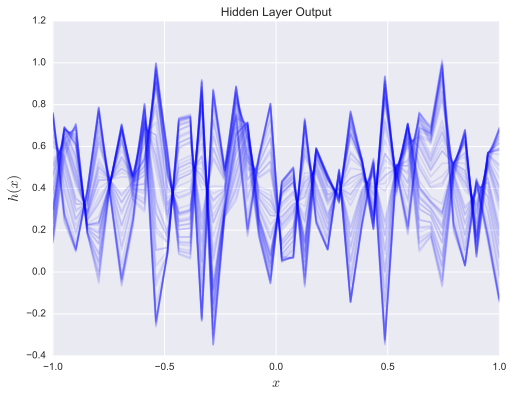

In [34]:
f = plt.figure()
f.set_size_inches(8, 6)
hidden_range = np.linspace(-1,1, 40)

for i in xrange(0, len(hidden)):
    plt.plot(hidden_range, hidden[i], color = 'b', alpha = 0.1)
    
plt.title('Hidden Layer Output')
plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$h(x)$', size = 14)
plt.savefig('hidden-layer-output-20-40.pdf')

In [61]:
henc1 = containers.Sequential()
henc1.add(Dense(output_dim = 30, input_dim = 40, init = 'glorot_normal', activation = 'relu'))
hdec1 = containers.Sequential()
hdec1.add(Dense(output_dim = 40, input_dim = 30, init = 'glorot_normal', activation = 'relu'))
hae1 = AutoEncoder(encoder = henc1, decoder = hdec1)
mae1 = models.Sequential()
mae1.add(hae1)

In [68]:
mae1.layers[0].output_reconstruction = False

In [69]:
mae1.compile(optimizer = 'sgd', loss = 'mse')

In [64]:
%%capture
mae1.fit(hidden, hidden, nb_epoch = 200)

In [70]:
hidden2 = mae1.predict(hidden)

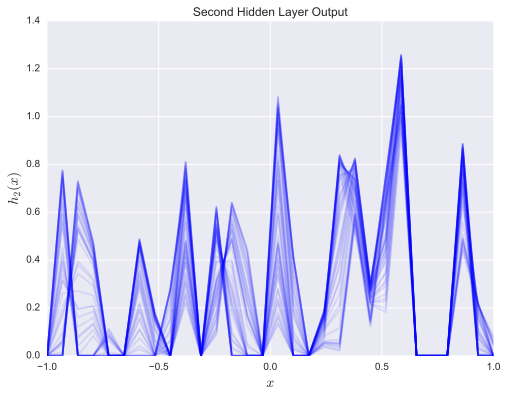

In [71]:
f = plt.figure()
f.set_size_inches(8, 6)
hidden_range = np.linspace(-1,1, 30)

for i in xrange(0, len(hidden2)):
    plt.plot(hidden_range, hidden2[i], color = 'b', alpha = 0.1)
    
plt.title('Second Hidden Layer Output')
plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$h_{2}(x)$', size = 14)
#plt.savefig('hidden2-output-20-40-30.pdf')